<a href="https://colab.research.google.com/github/dinorahfariasc/MachineLearning/blob/main/Pr%C3%A9_processamento_(pr%C3%A1tica_de_PCA_e_sele%C3%A7%C3%A3o_de_atributos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Redução de Dimensionalidade </h2>

Dinorah de Farias Chagas

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# lendo datasets
base1 = pd.read_csv('Image.csv')
base2 = pd.read_csv('Madelon.csv')
base3 = pd.read_csv('Waveform.csv')

### Para o dataset **Image.csv**

In [11]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att1    2310 non-null   int64  
 1   att2    2310 non-null   int64  
 2   att3    2310 non-null   int64  
 3   att4    2310 non-null   float64
 4   att5    2310 non-null   float64
 5   att6    2310 non-null   float64
 6   att7    2310 non-null   float64
 7   att8    2310 non-null   float64
 8   att9    2310 non-null   float64
 9   att10   2310 non-null   float64
 10  att11   2310 non-null   float64
 11  att12   2310 non-null   float64
 12  att13   2310 non-null   float64
 13  att14   2310 non-null   float64
 14  att15   2310 non-null   float64
 15  att16   2310 non-null   float64
 16  att17   2310 non-null   float64
 17  att18   2310 non-null   float64
 18  att19   2310 non-null   float64
 19  classe  2310 non-null   object 
dtypes: float64(16), int64(3), object(1)
memory usage: 361.1+ KB


In [15]:
base1.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,classe
0,140,125,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,BRICKFACE
1,188,133,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,BRICKFACE
2,105,139,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,BRICKFACE
3,34,137,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,BRICKFACE
4,39,111,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,BRICKFACE


transformando o atributo classe para uma forma binaria

In [16]:
from sklearn.preprocessing import LabelEncoder # transformando object -> binario
le = LabelEncoder()
base1['classeBin'] = le.fit_transform(base1['classe'])
print(base1[['classe', 'classeBin']])

In [20]:
# removendo atributo classe
base1.drop('classe', axis=1, inplace=True)
base1.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,classeBin
0,140,125,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,0
1,188,133,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,0
2,105,139,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,0
3,34,137,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,0
4,39,111,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,0


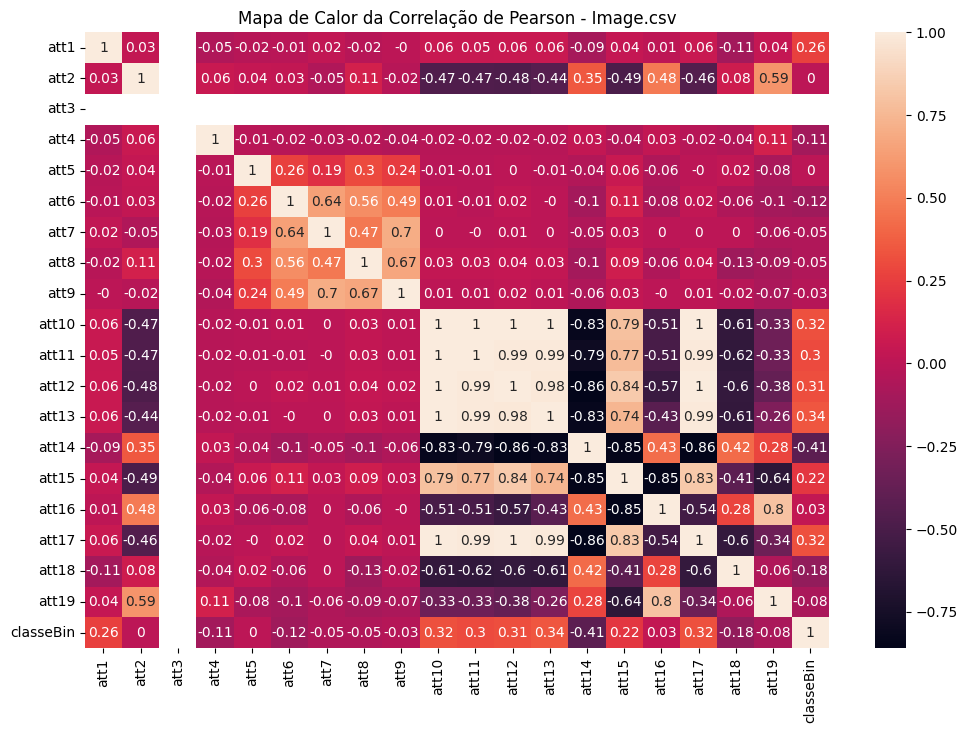

In [33]:
correlation_matrix = base1.corr().round(2)
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Mapa de Calor da Correlação de Pearson - Image.csv')
plt.show()

In [22]:
least_correlated = correlation_matrix.abs().sum().nsmallest(10)
print("Atributos menos correlacionados de Image.csv :", least_correlated.index)

Atributos menos correlacionados de Image.csv : Index(['att3', 'att4', 'att1', 'att5', 'att7', 'att9', 'att6', 'att8',
       'classeBin', 'att2'],
      dtype='object')


In [26]:
pca = PCA(n_components=10)
base1_pca_10 = pca.fit_transform(base1)
print(base1_pca_10.shape)

(2310, 10)


In [29]:
# PCA para 90% de variancia
pca_90 = PCA(n_components=0.90)
base1_pca_90 = pca_90.fit_transform(base1)
base1_pca_90.shape

(2310, 4)

In [30]:
pd.DataFrame(base1_pca_10).to_csv('base1_pca_10.csv', index=False)
pd.DataFrame(base1_pca_90).to_csv('base1_pca_90.csv', index=False)

## Para o dataset **Mandelon.csv**

In [36]:
base2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Columns: 501 entries, a_0 to classe
dtypes: int64(501)
memory usage: 9.9 MB


In [38]:
base2.head()

,a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,...,a_491,a_492,a_493,a_494,a_495,a_496,a_497,a_498,a_499,classe
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,-1
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,-1
2,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,1
3,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,1
4,481,496,451,480,516,484,484,476,500,482,...,481,477,435,491,564,482,463,457,500,1


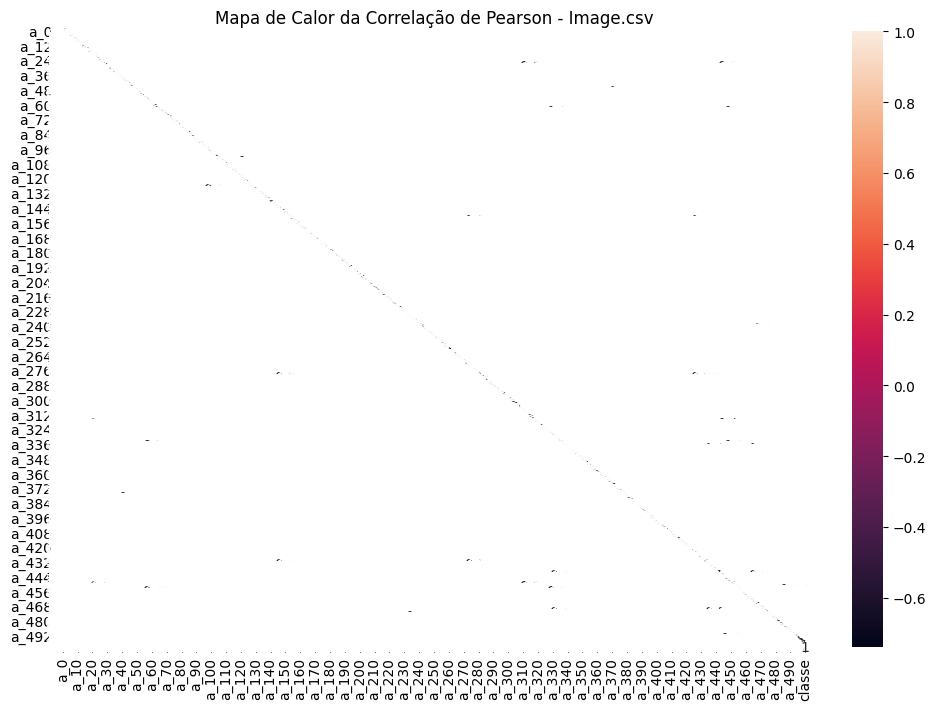

In [39]:
correlation_matrix = base2.corr().round(2)
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Mapa de Calor da Correlação de Pearson - Mandelon')
plt.show()

In [40]:
least_correlated = correlation_matrix.abs().sum().nsmallest(10)
print("Atributos menos correlacionados de Madelon.csv :", least_correlated.index)

Atributos menos correlacionados de Madelon.csv : Index(['a_67', 'a_75', 'a_197', 'a_205', 'a_388', 'a_20', 'a_150', 'a_103',
       'a_276', 'a_85'],
      dtype='object')


In [41]:
pca2 = PCA(n_components=10)
base2_pca_10 = pca2.fit_transform(base2)
print(base2_pca_10.shape)

(2600, 10)


In [42]:
# PCA para 90% de variancia
pca_90_2 = PCA(n_components=0.90)
base2_pca_90 = pca_90_2.fit_transform(base2)
base2_pca_90.shape

(2600, 229)

In [50]:
pd.DataFrame(base2_pca_10).to_csv('base2_pca_10.csv', index=False)
pd.DataFrame(base2_pca_90).to_csv('base2_pca_90.csv', index=False)

## Para o dataset **Waveform.csv**

In [44]:
base3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5000 non-null   float64
 1   x2      5000 non-null   float64
 2   x3      5000 non-null   float64
 3   x4      5000 non-null   float64
 4   x5      5000 non-null   float64
 5   x6      5000 non-null   float64
 6   x7      5000 non-null   float64
 7   x8      5000 non-null   float64
 8   x9      5000 non-null   float64
 9   x10     5000 non-null   float64
 10  x11     5000 non-null   float64
 11  x12     5000 non-null   float64
 12  x13     5000 non-null   float64
 13  x14     5000 non-null   float64
 14  x15     5000 non-null   float64
 15  x16     5000 non-null   float64
 16  x17     5000 non-null   float64
 17  x18     5000 non-null   float64
 18  x19     5000 non-null   float64
 19  x20     5000 non-null   float64
 20  x21     5000 non-null   float64
 21  x22     5000 non-null   float64
 22  

In [45]:
base3.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x32,x33,x34,x35,x36,x37,x38,x39,x40,classe
0,-0.23,-1.21,1.20,1.23,-0.10,0.12,2.49,1.19,1.34,0.58,...,-0.86,-0.70,0.51,0.34,-0.13,-0.87,0.56,-0.53,0.29,2
1,-0.69,1.00,1.08,1.48,2.44,3.39,3.09,4.08,5.48,3.61,...,0.29,1.12,0.60,0.28,2.17,0.18,-0.09,-1.33,1.00,1
2,0.40,0.68,0.27,1.39,1.03,-0.32,-1.23,-0.50,0.11,0.87,...,0.43,-0.30,-0.07,-0.99,-0.75,1.11,1.35,-1.63,0.10,0
3,0.59,0.77,-0.61,1.00,1.80,2.08,2.16,3.59,4.08,3.63,...,1.23,-0.29,-1.62,0.19,-1.04,0.43,-1.82,-1.14,-0.23,1
4,-0.15,0.13,2.27,2.39,4.00,6.14,5.36,4.08,3.81,3.89,...,0.25,-0.78,-0.12,-0.35,0.44,0.31,-0.45,-0.23,0.27,0


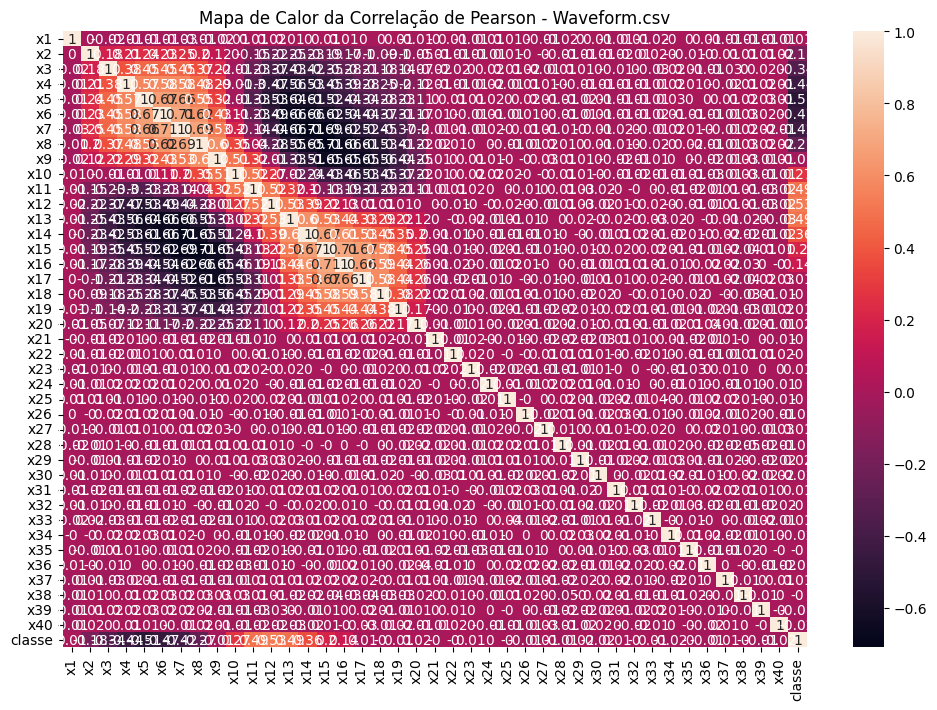

In [46]:
correlation_matrix = base3.corr().round(2)
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Mapa de Calor da Correlação de Pearson - Waveform.csv')
plt.show()

In [47]:
pca3 = PCA(n_components=10)
base3_pca_10 = pca3.fit_transform(base3)
print(base3_pca_10.shape)

(5000, 10)


In [48]:
# PCA para 90% de variancia
pca_90_3 = PCA(n_components=0.90)
base3_pca_90 = pca_90_3.fit_transform(base3)
base3_pca_90.shape

(5000, 33)

In [51]:
pd.DataFrame(base3_pca_10).to_csv('base3_pca_10.csv', index=False)
pd.DataFrame(base3_pca_90).to_csv('base3_pca_90.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')